In [4]:
!pwd
!date
!ls

/home/sphere/github/Sphere/Data2013/currents
Пн апр 23 21:15:33 MSK 2018
1currents.txt  3currents.txt  5currents.txt	 Untitled.ipynb
2currents.txt  4currents.txt  currents_2013.txt


In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from tqdm import tqdm
import math as mt
import numpy as np

In [99]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3.5
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14

In [111]:
datum = []
for i in range(1, 6):
    filename = str(i) + 'currents.txt'
    data = pd.read_csv(filename, header = 0, index_col=0, sep='\t')
    data['run'] = i
    #print(data.shape) #, data.head())
    datum.append(data)
datum = pd.concat(datum)
print(len(datum))
print(datum.shape)
#datum.run.value_counts()

3801
(3801, 115)


In [112]:
datum.head(2)

H      time  cur1  cur2  cur3  cur4  cur5  cur6  cur7  cur8 ...   \
N                                                                      ...    
10675  307.8  13:13:07   3.0   7.1   4.1   3.5   7.5   5.3   6.5   8.3 ...    
10676  307.8  13:13:07   3.0   7.1   4.1   3.5   7.5   5.3   6.5   8.3 ...    

       cur104  cur105  cur106  cur107  cur108  cur109  cur110  cur111  cur112  \
N                                                                               
10675     3.0    13.9     4.2     2.3     8.2     2.8     0.0     0.0     0.0   
10676     3.0    13.9     4.2     2.3     8.2     2.8     0.0     0.0     0.0   

       run  
N           
10675    1  
10676    1  

[2 rows x 115 columns]

In [ ]:
from matplotlib import dates
import datetime as dt

fmt = dates.DateFormatter('%H:%M')
plcol = ['m+-','bx--', 'gs:', 'rd-.', 'co-']
plt.rcParams['figure.figsize'] =(12,4)

pmt = 14
cur = 'cur' + str(pmt)

fig, ax = plt.subplots()
for i in range(1, 6):
    data = datum[datum.run == i]
    time_interval = [dt.datetime.strptime(i, "%H:%M:%S") for i in data.time]
    y = data[cur]
    ax.plot(time_interval, y, plcol[i-1], label = i)
    
ax.xaxis.set_major_formatter(fmt)
ax.set_title('PMT' + str(pmt))
#fig.autofmt_xdate()
plt.legend(borderaxespad=0.1)
plt.grid()

/home/sphere/Soft/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


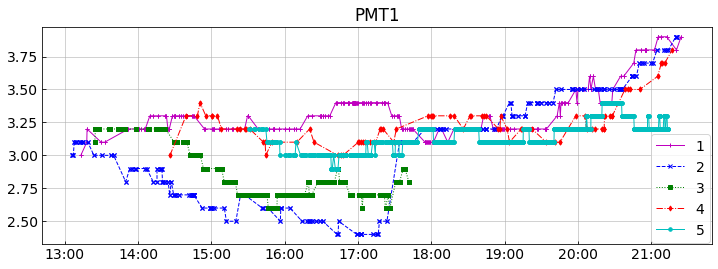

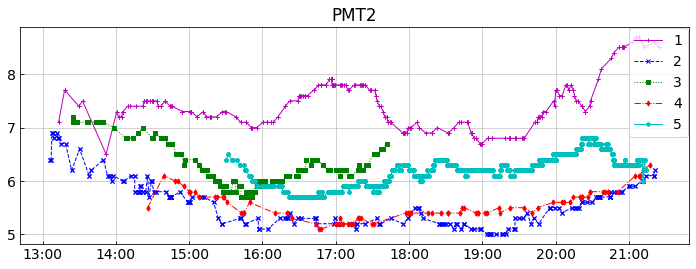

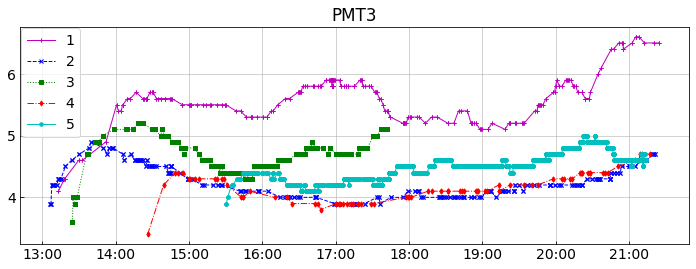

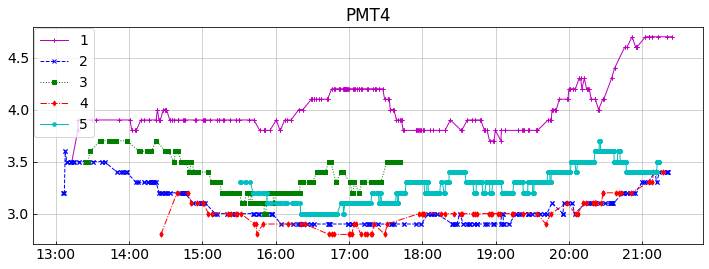

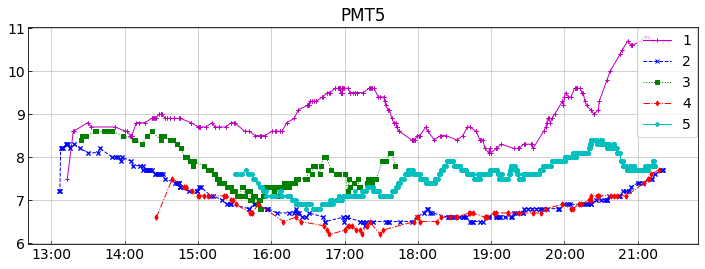

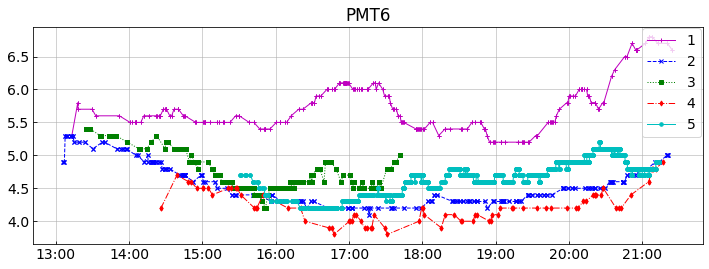

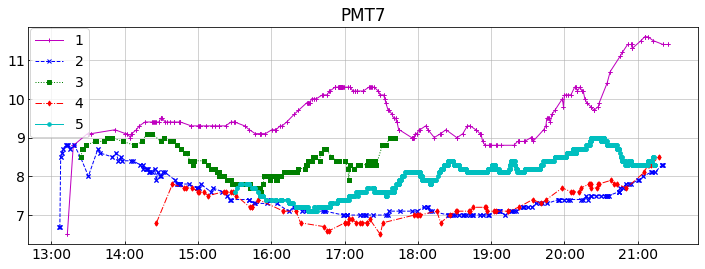

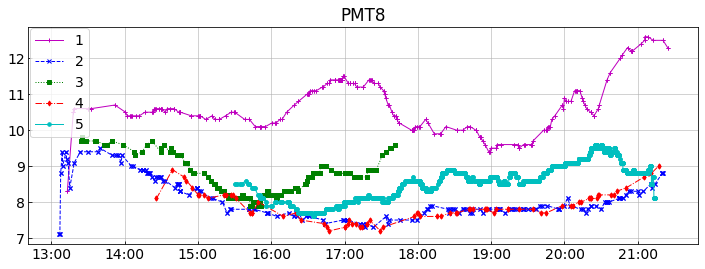

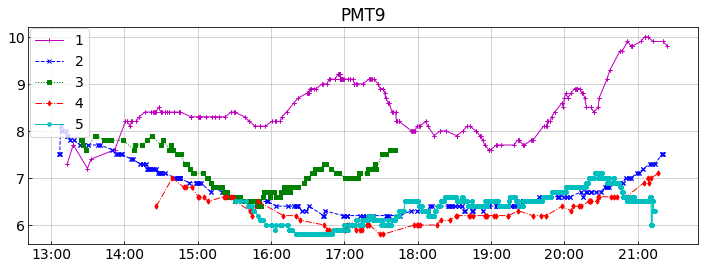

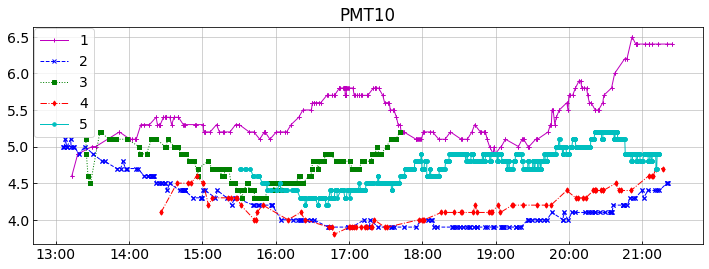

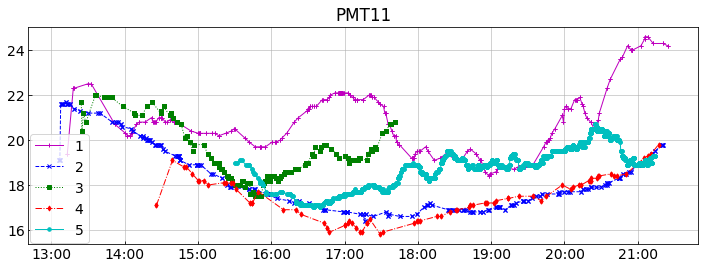

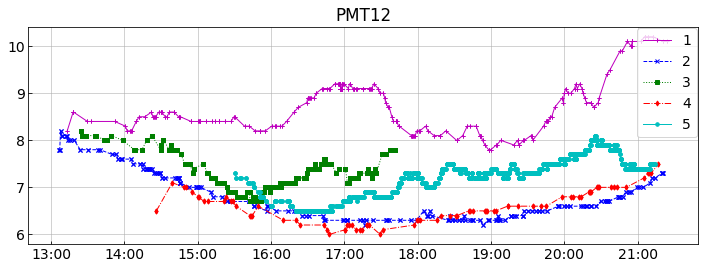

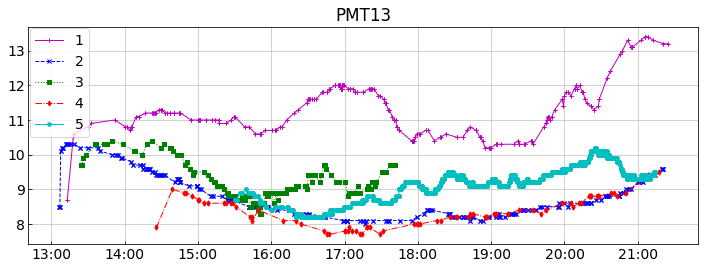

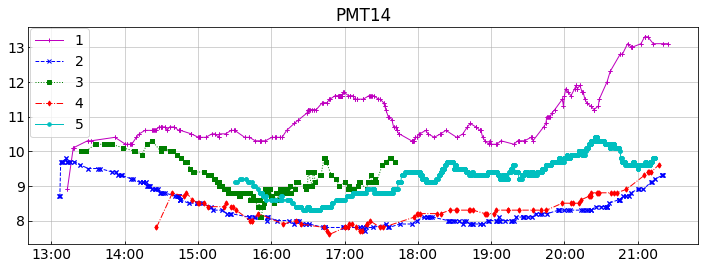

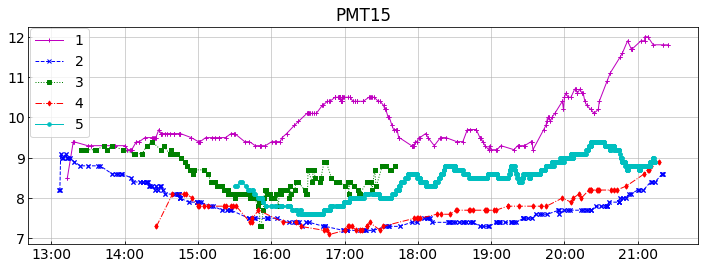

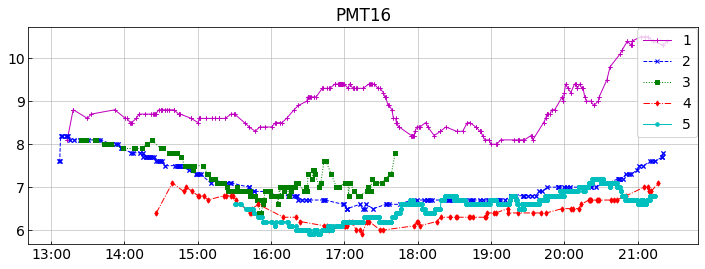

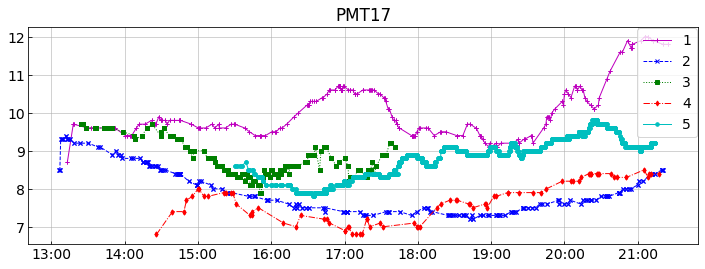

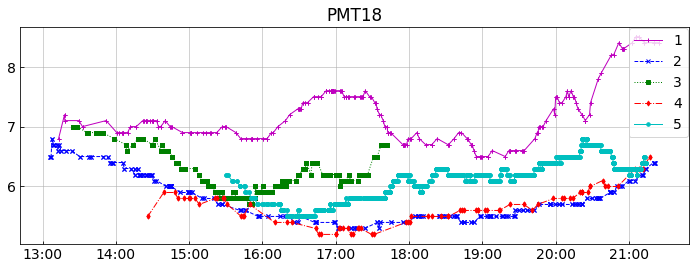

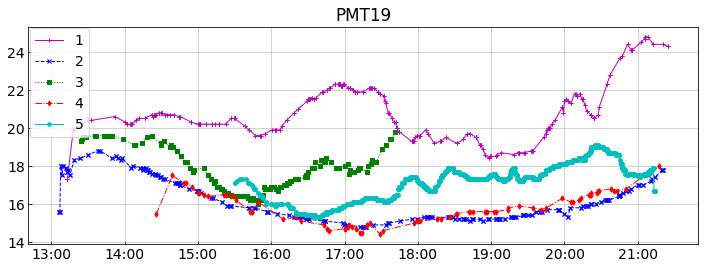

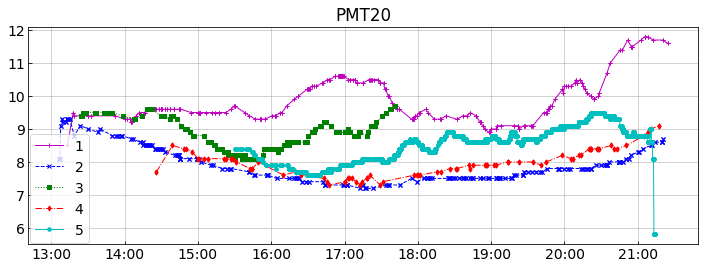

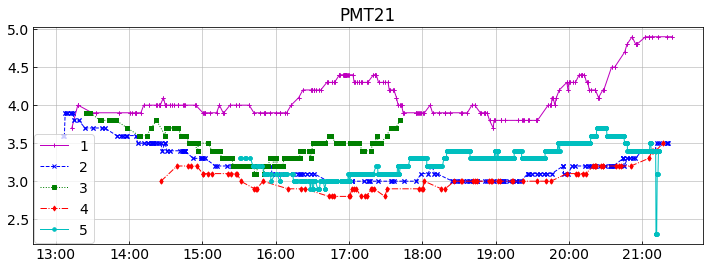

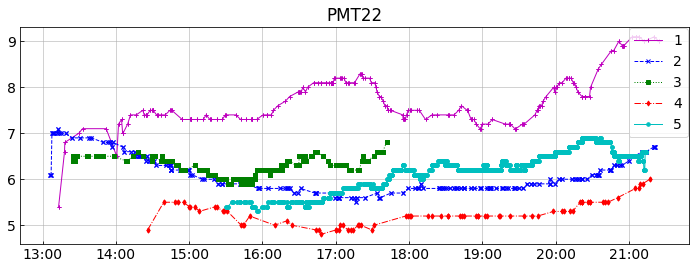

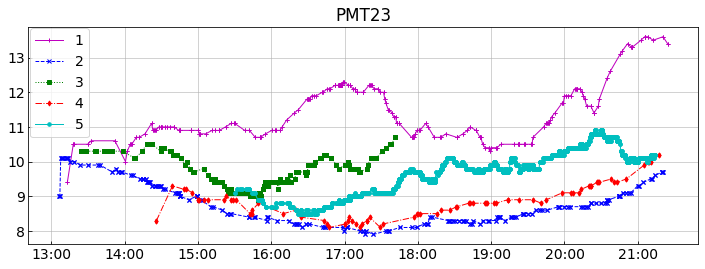

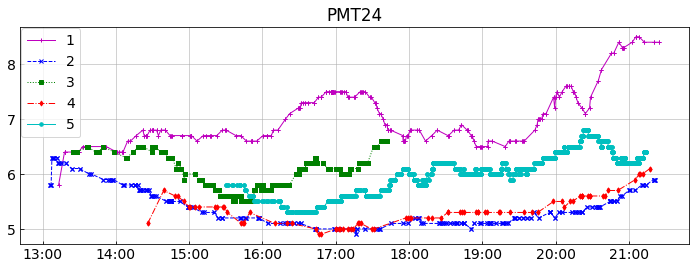

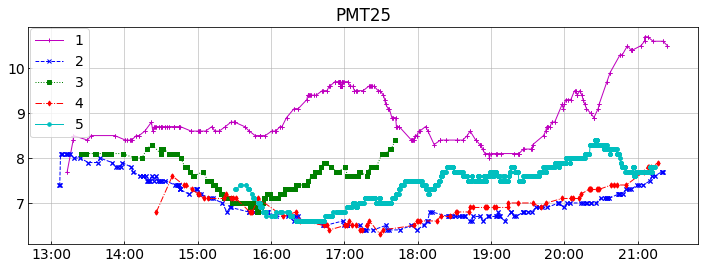

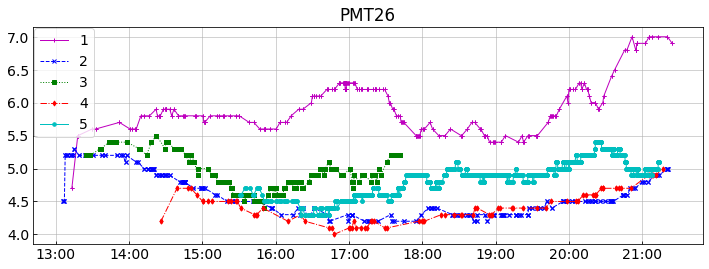

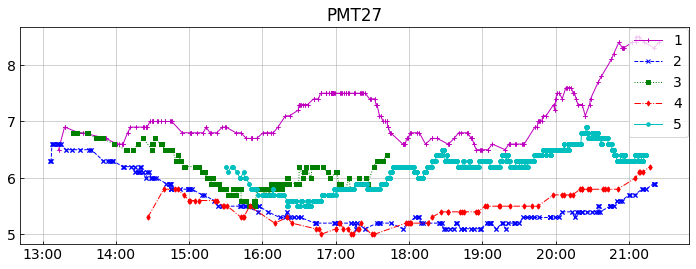

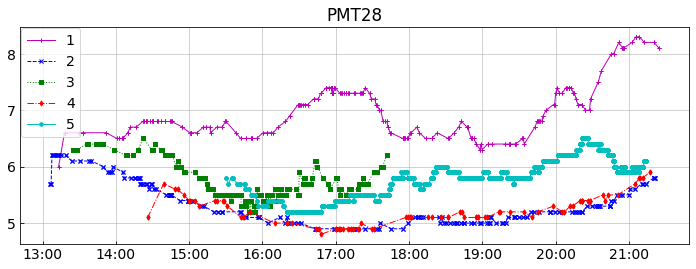

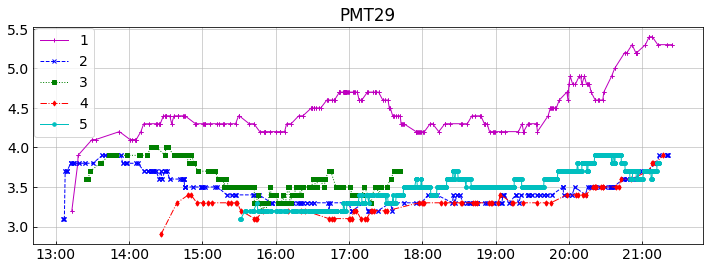

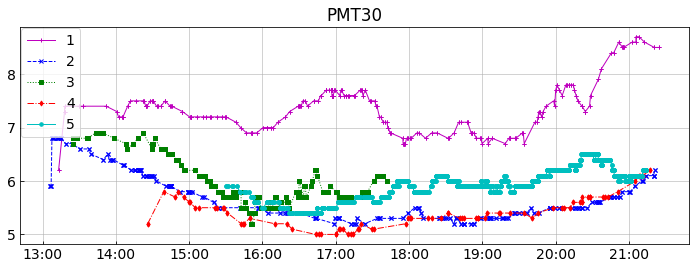

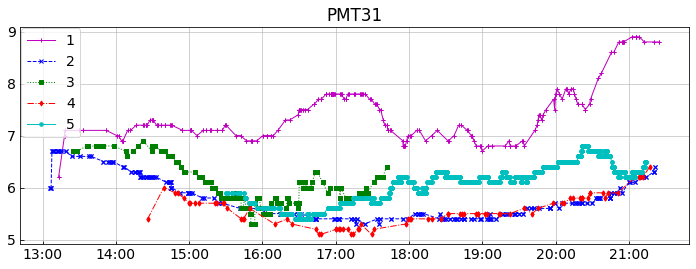

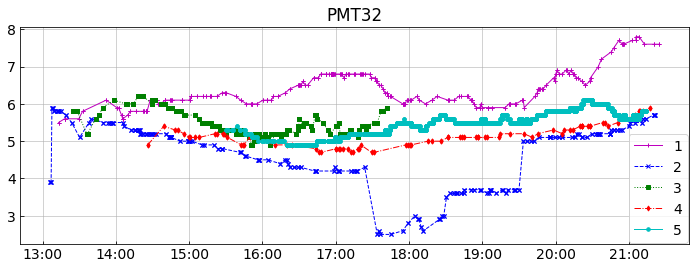

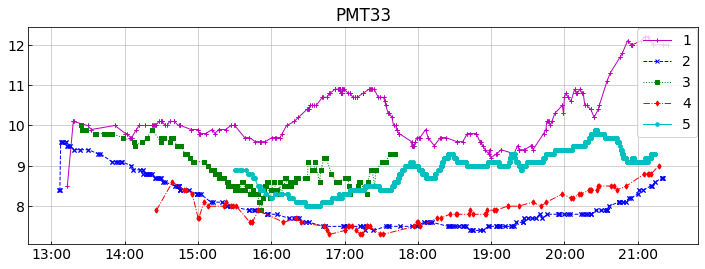

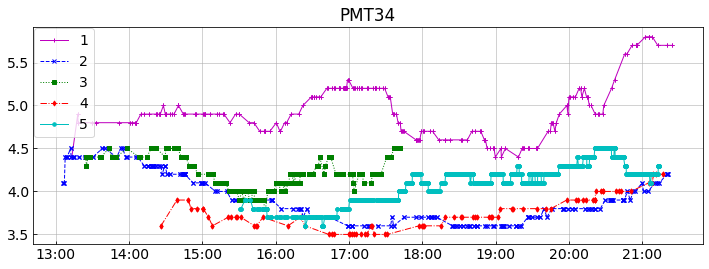

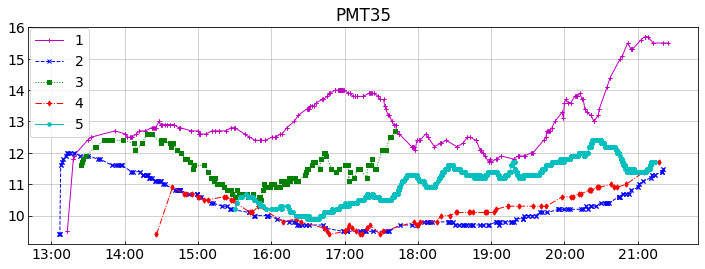

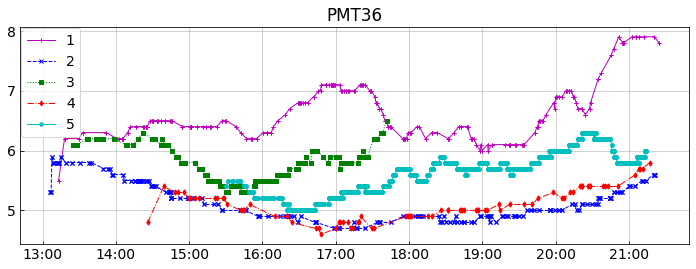

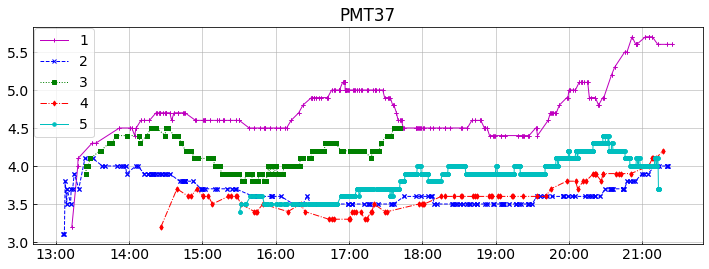

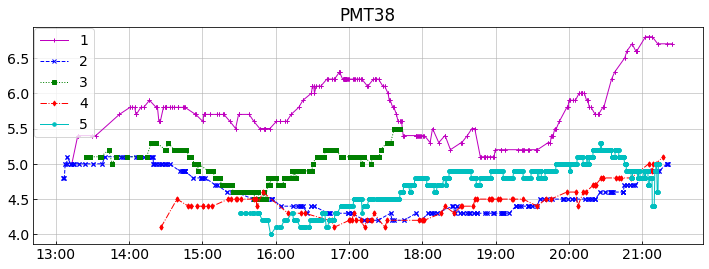

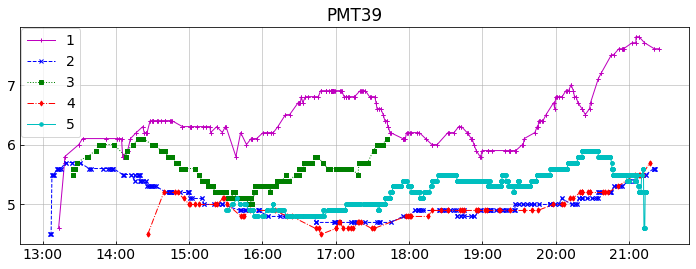

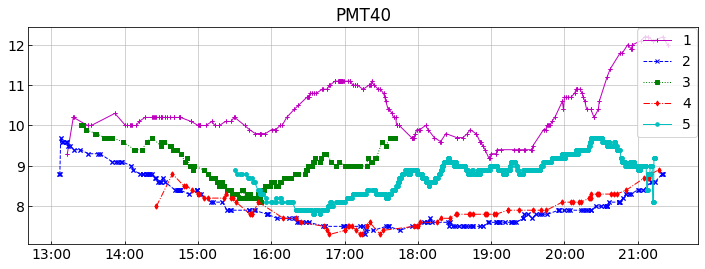

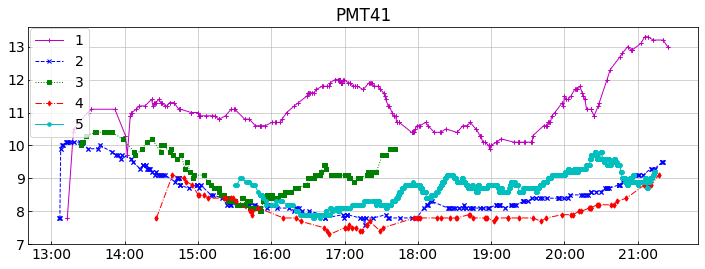

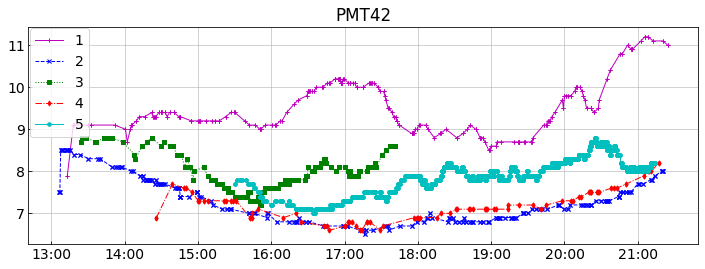

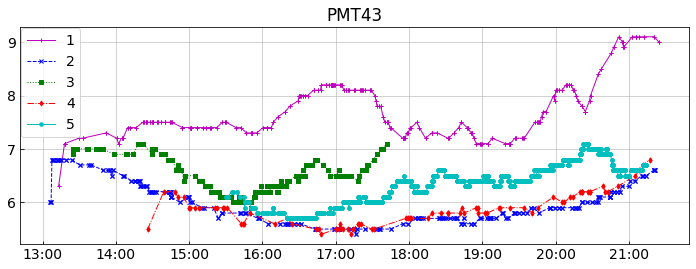

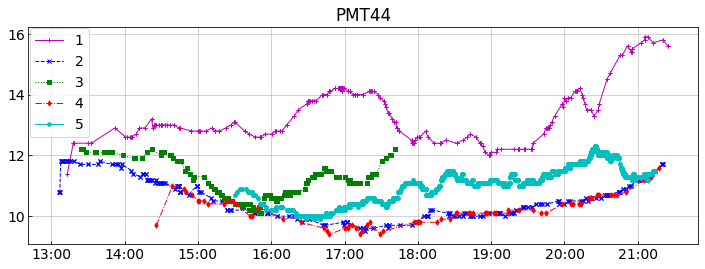

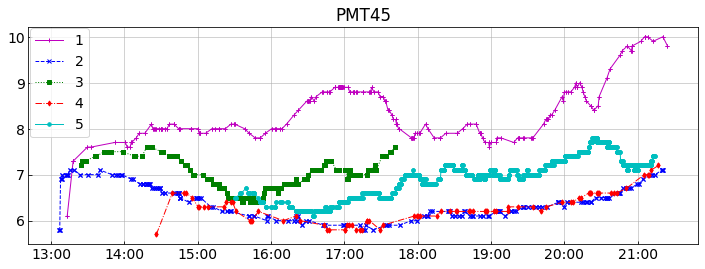

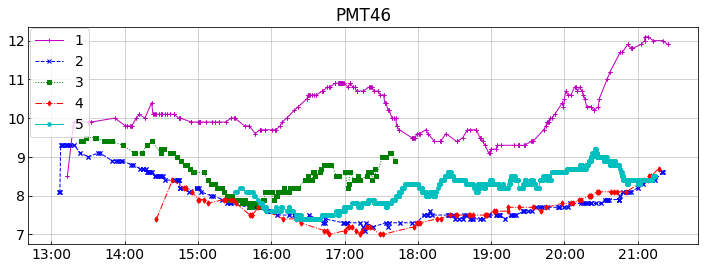

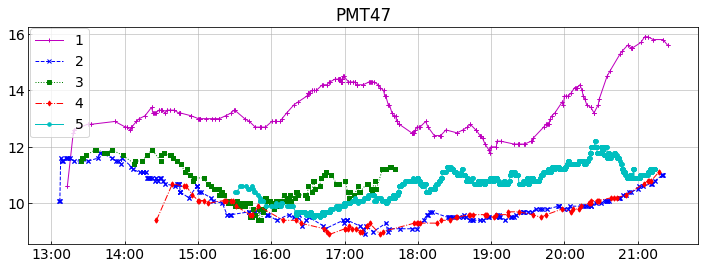

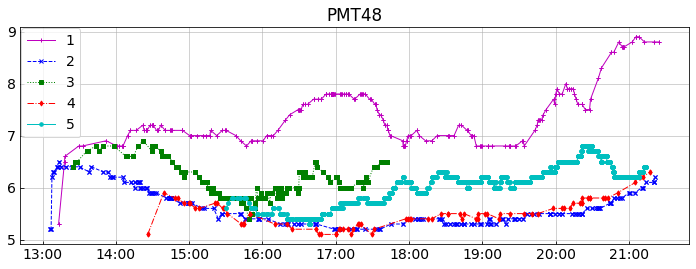

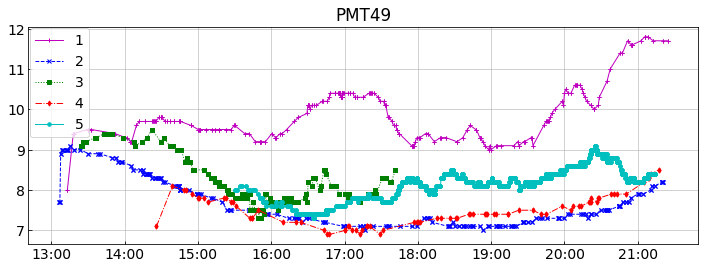

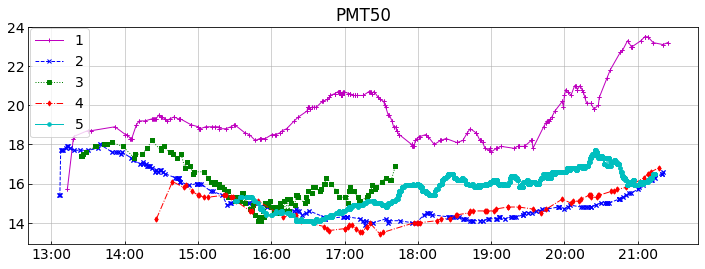

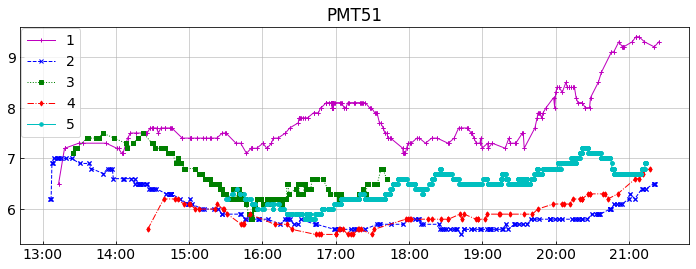

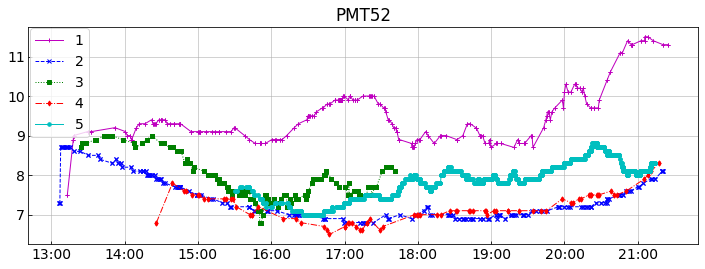

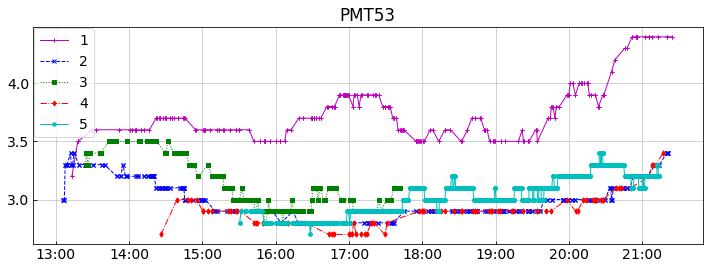

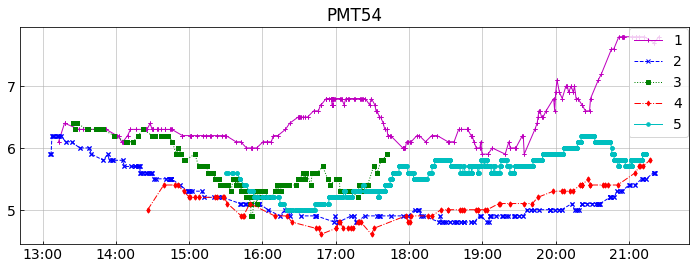

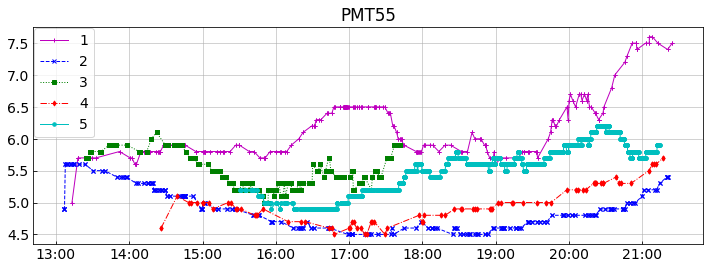

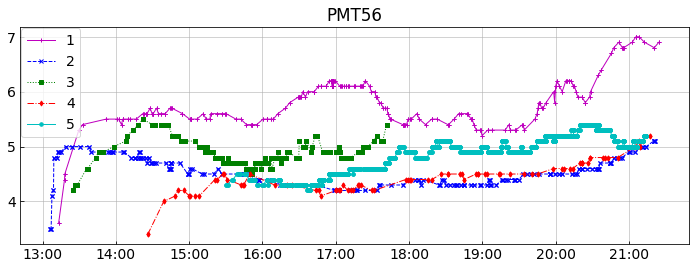

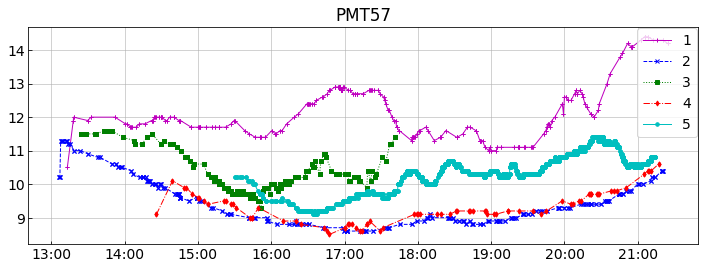

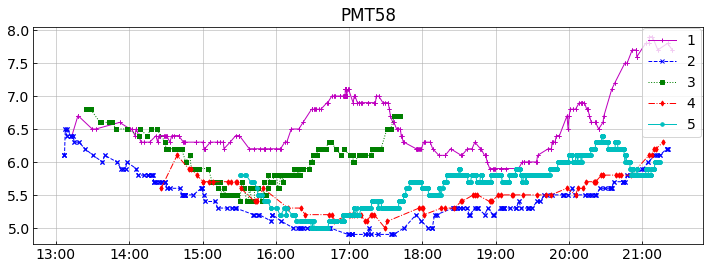

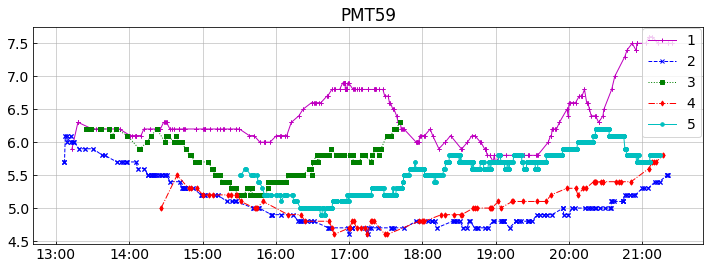

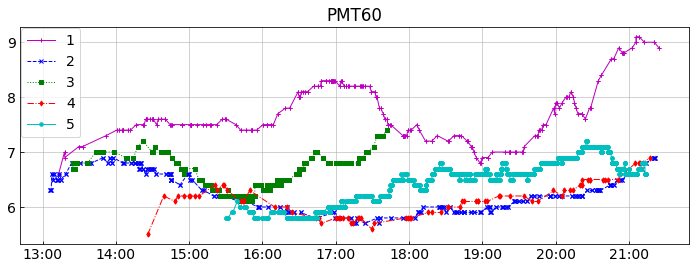

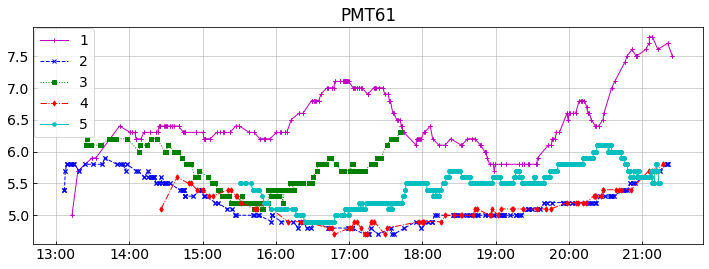

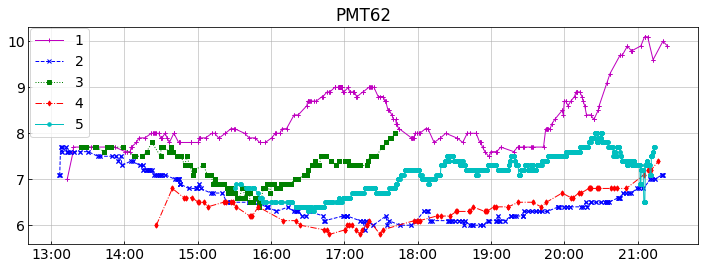

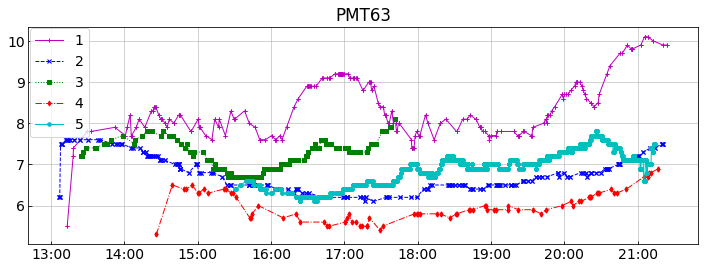

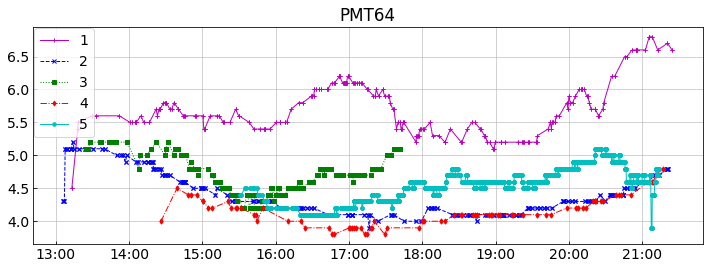

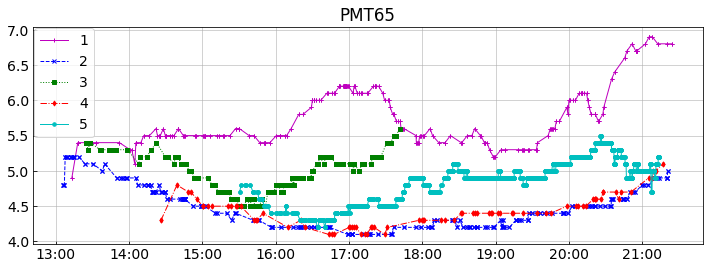

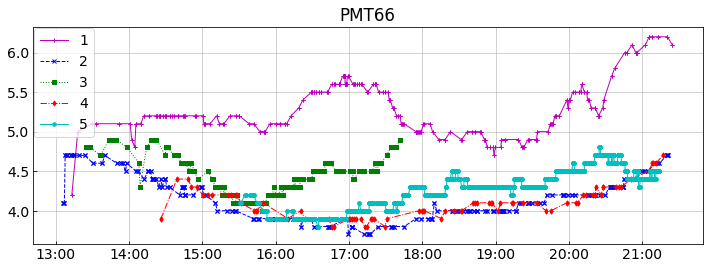

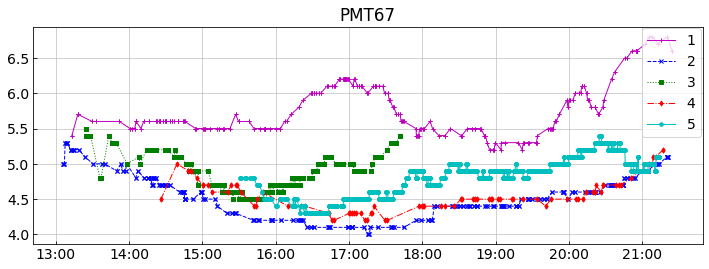

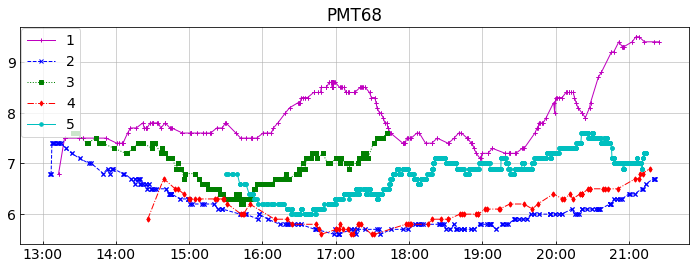

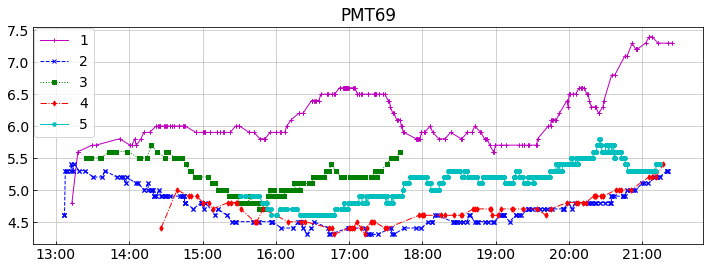

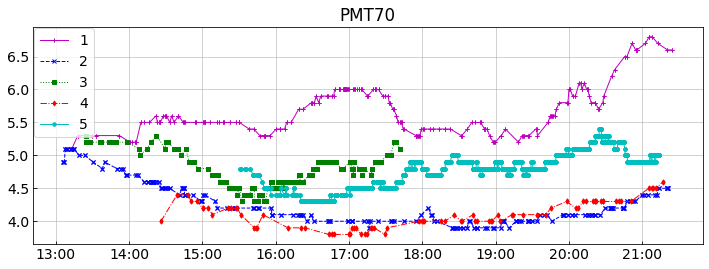

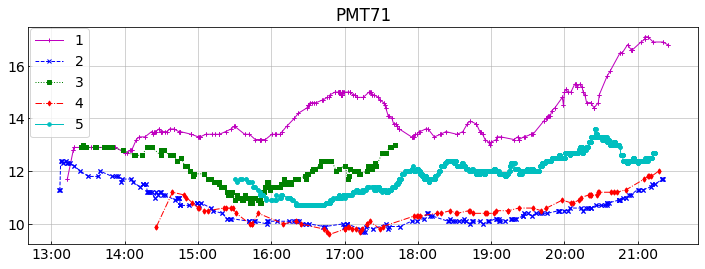

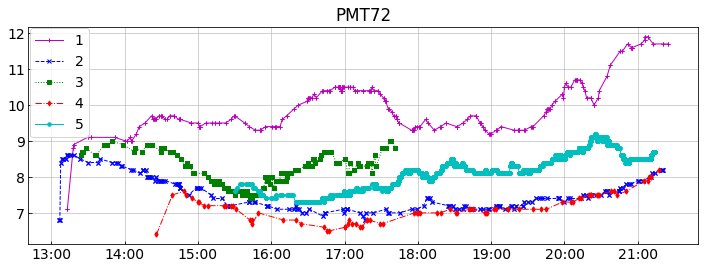

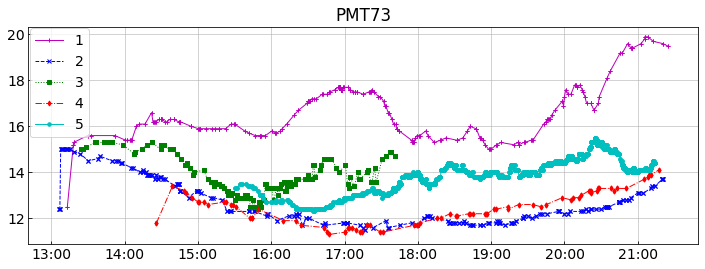

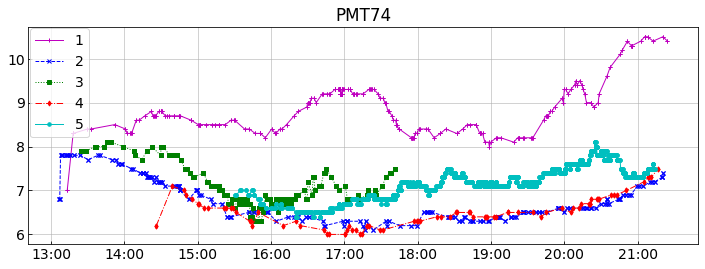

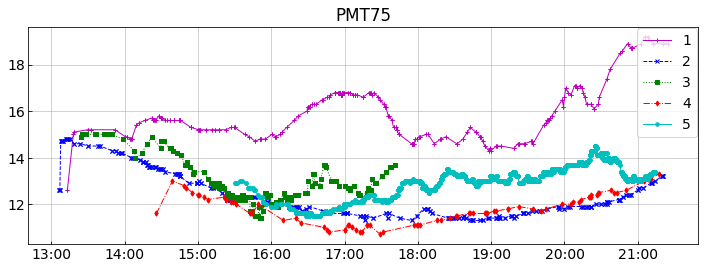

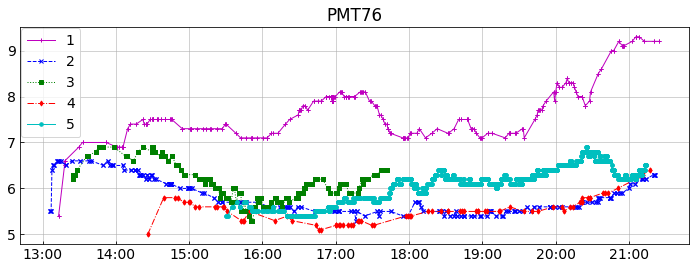

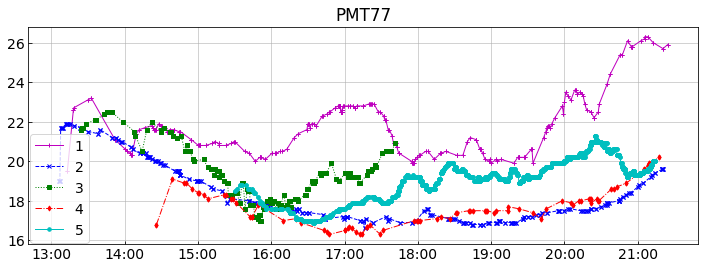

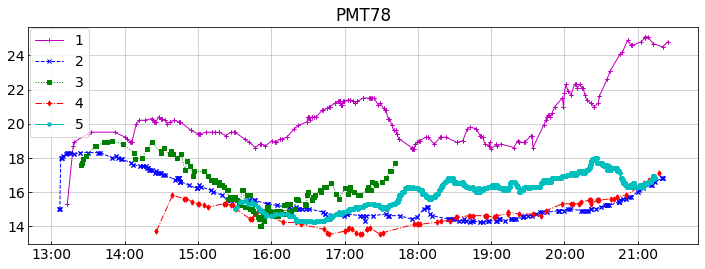

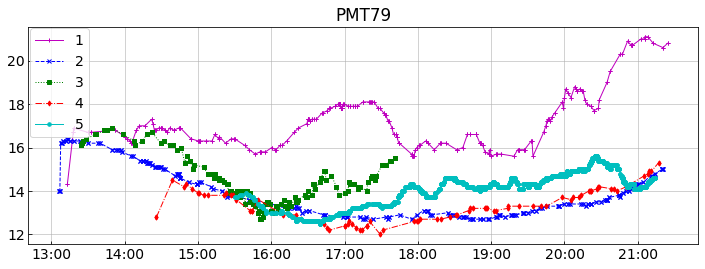

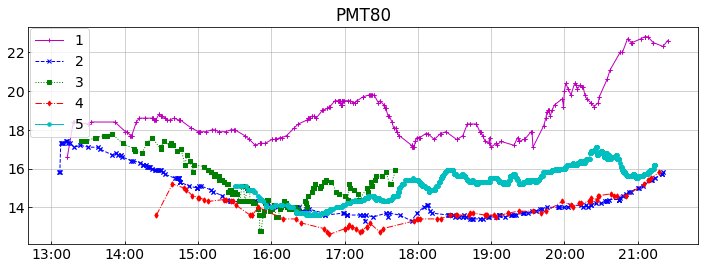

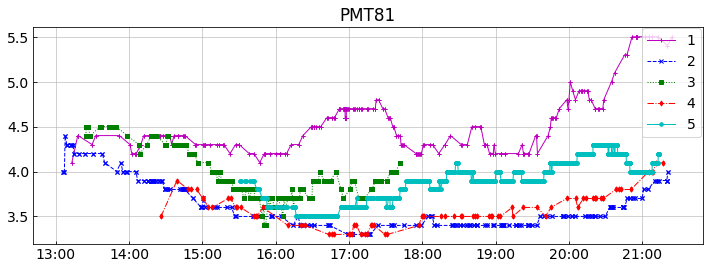

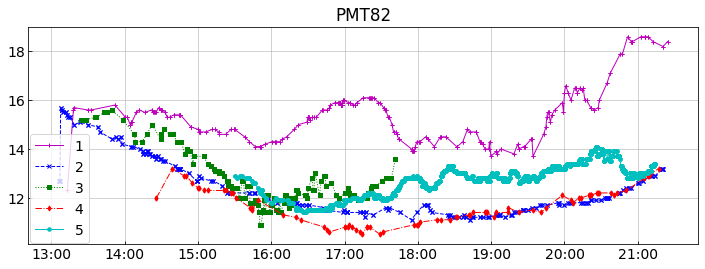

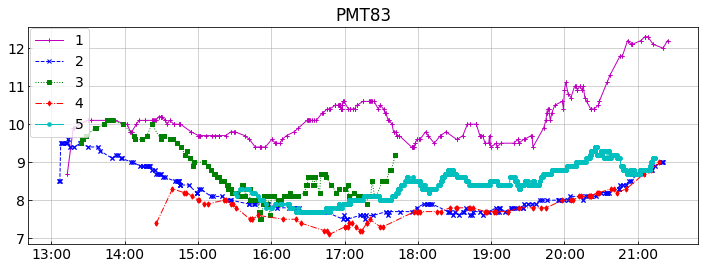

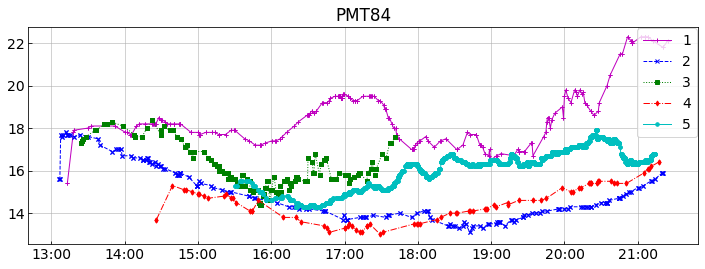

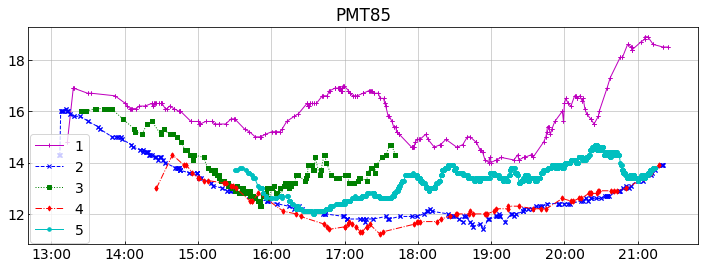

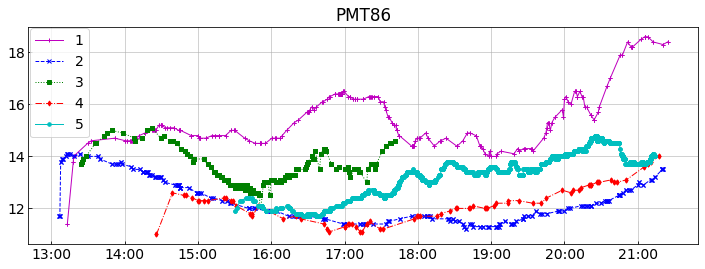

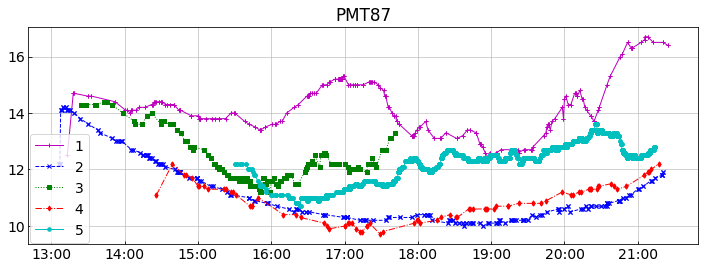

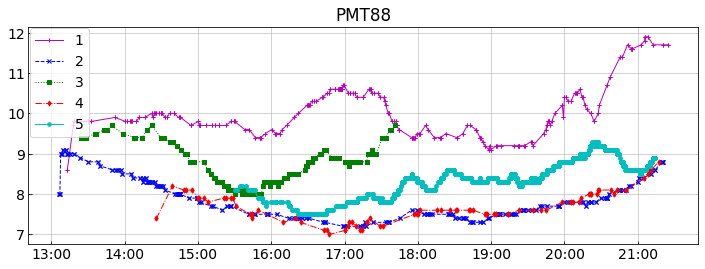

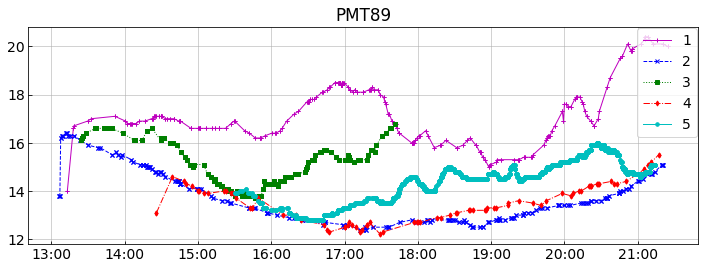

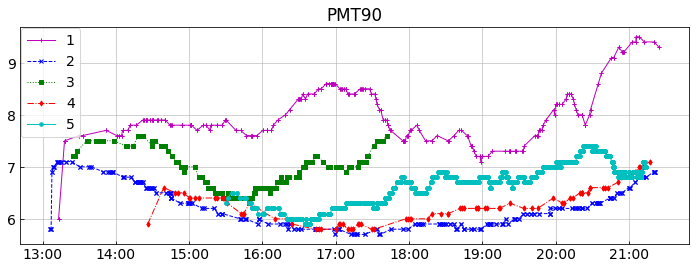

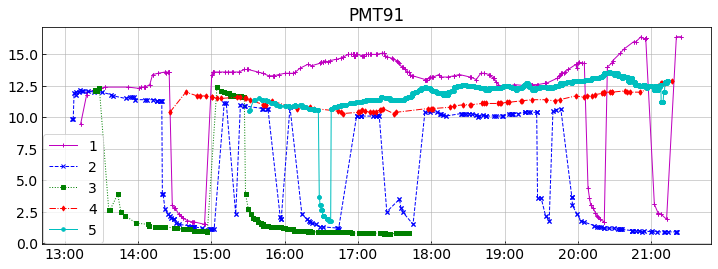

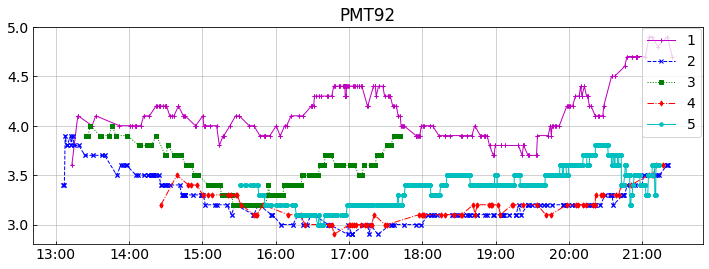

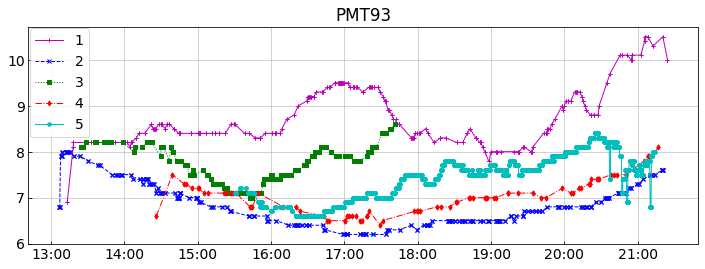

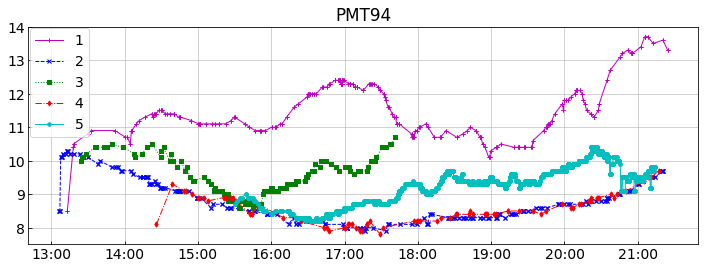

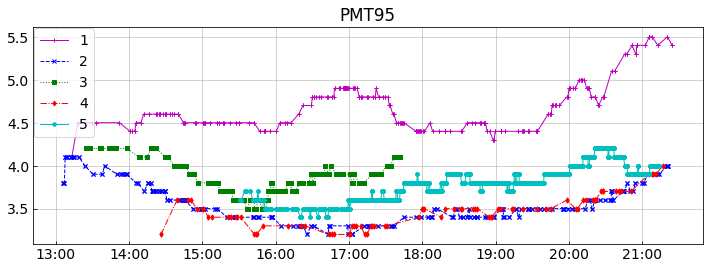

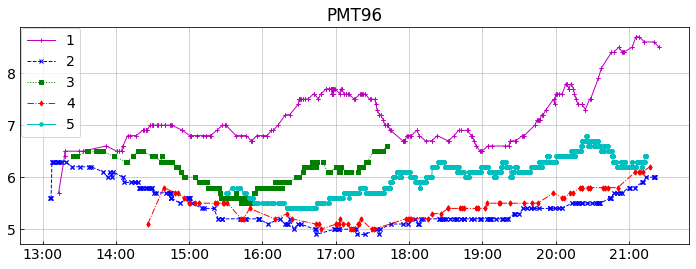

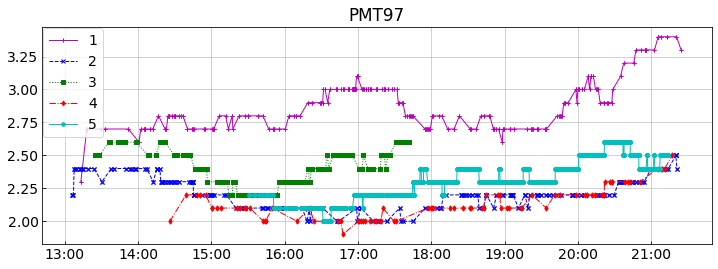

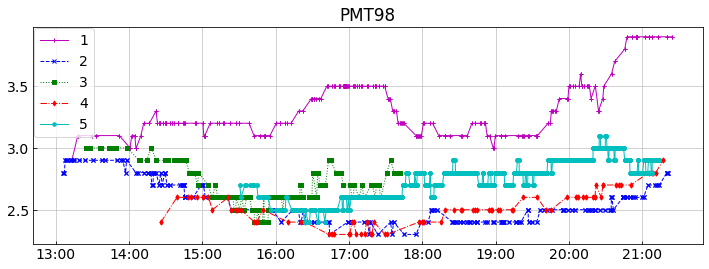

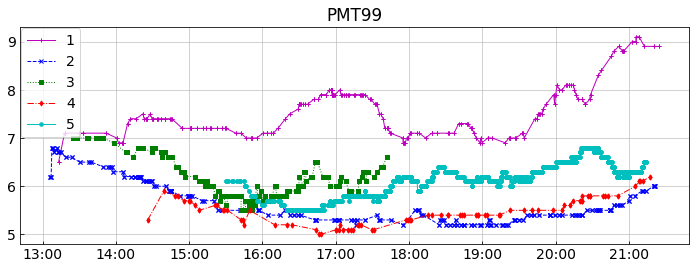

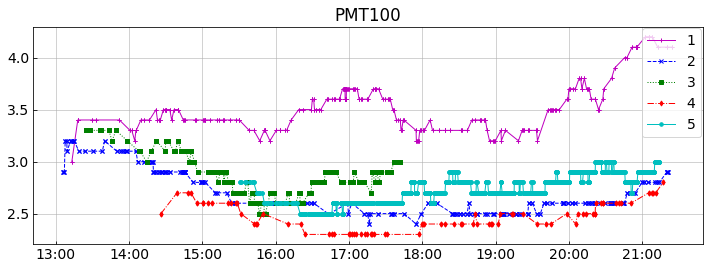

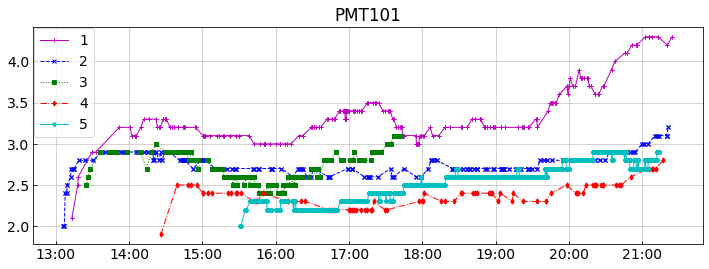

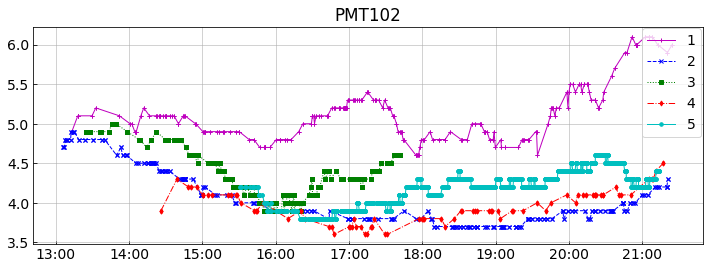

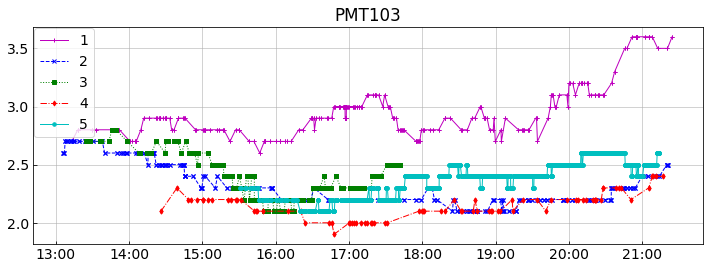

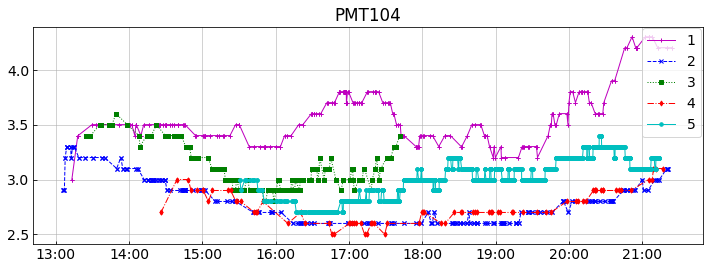

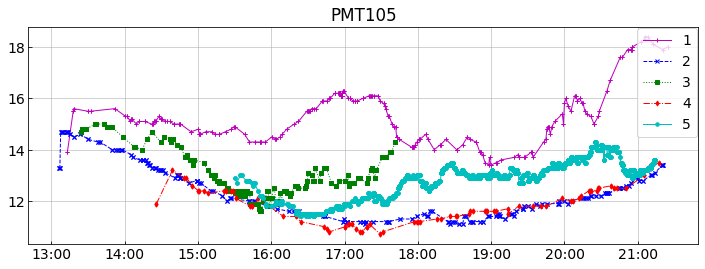

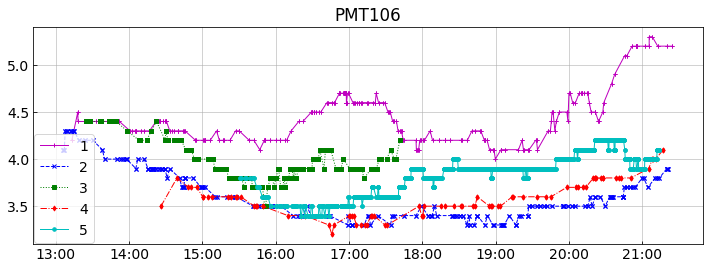

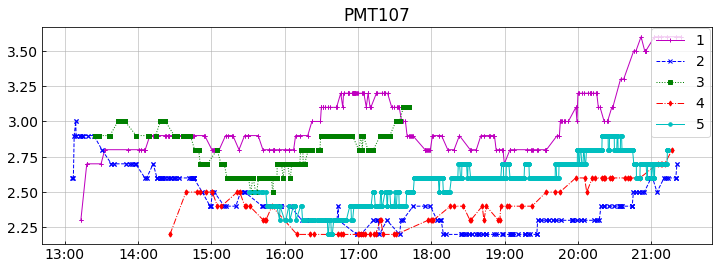

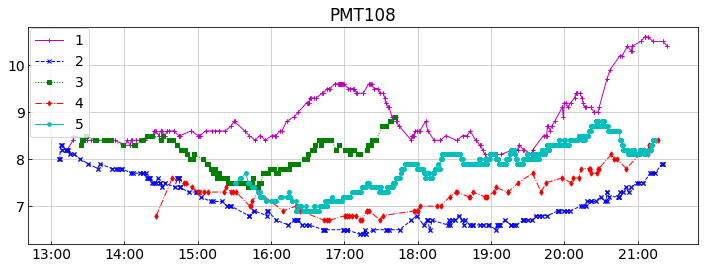

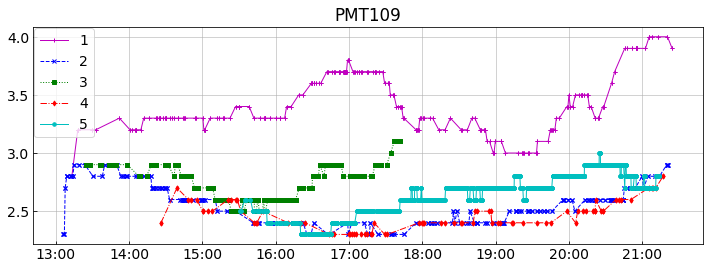

In [110]:
fmt = dates.DateFormatter('%H:%M')
plcol = ['m+-','bx--', 'gs:', 'rd-.', 'co-']
plt.rcParams['figure.figsize'] =(12,4)

for pmt in range(1,110):
    cur = 'cur' + str(pmt)

    fig, ax = plt.subplots()
    for i in range(1, 6):
        data = datum[datum.run == i]
        time_interval = [dt.datetime.strptime(i, "%H:%M:%S") for i in data.time]
        y = data[cur]
        ax.plot(time_interval, y, plcol[i-1], label = i)

    ax.xaxis.set_major_formatter(fmt)
    ax.set_title('PMT' + str(pmt))
    #fig.autofmt_xdate()
    plt.legend(borderaxespad=0.1)
    plt.grid()